In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss
import statsmodels.api as sm
from pylab import rcParams

In [3]:
books = pd.read_csv("/Users/rahulnair/Desktop/Labelmaster_/data/Books_data.csv")

In [323]:
books

,Unnamed: 0,Department Dim,Product Group Code,Posting Date,Sum of Sales,Date,Time,Year_Month
0,0,504,NaN,1993-01-04 00:00:00,7963.55,1993-01-04,00:00:00,1993-01
1,1,504,NaN,1993-01-05 00:00:00,14667.70,1993-01-05,00:00:00,1993-01
2,2,504,NaN,1993-01-06 00:00:00,8421.50,1993-01-06,00:00:00,1993-01
3,3,504,NaN,1993-01-07 00:00:00,11616.85,1993-01-07,00:00:00,1993-01
4,4,504,NaN,1993-01-08 00:00:00,15092.72,1993-01-08,00:00:00,1993-01
...,...,...,...,...,...,...,...,...
160181,160181,504,50404.0,2021-01-07 00:00:00,0.00,2021-01-07,00:00:00,2021-01
160182,160182,504,50406.0,2021-01-07 00:00:00,0.00,2021-01-07,00:00:00,2021-01
160183,160183,504,50407.0,2021-01-07 00:00:00,0.00,2021-01-07,00:00:00,2021-01
160184,160184,504,50408.0,2021-01-07 00:00:00,146.00,2021-01-07,00:00:00,2021-01


In [324]:
y = []
for i in books['Year_Month'].astype(str):
    y.append(''.join(re.findall('\d{4}', i)))
    
books['Year'] = pd.Series(y)
books['Year'] = books['Year'].astype(int)

In [325]:
books = books[books.Year >= 2008]
books.reset_index(inplace=True, drop=True)

In [326]:
books

,Unnamed: 0,Department Dim,Product Group Code,Posting Date,Sum of Sales,Date,Time,Year_Month,Year
0,54501,504,NaN,2008-01-02 09:45:04.557000,0.0,2008-01-02,09:45:04.557000,2008-01,2008
1,54502,504,NaN,2008-01-02 09:45:47.513000,0.0,2008-01-02,09:45:47.513000,2008-01,2008
2,54503,504,NaN,2008-01-02 09:46:56.713000,0.0,2008-01-02,09:46:56.713000,2008-01,2008
3,54504,504,50405.0,2008-01-02 10:08:15.260000,115.0,2008-01-02,10:08:15.260000,2008-01,2008
4,54505,504,50405.0,2008-01-02 10:08:24.370000,98.5,2008-01-02,10:08:24.370000,2008-01,2008
...,...,...,...,...,...,...,...,...,...
105680,160181,504,50404.0,2021-01-07 00:00:00,0.0,2021-01-07,00:00:00,2021-01,2021
105681,160182,504,50406.0,2021-01-07 00:00:00,0.0,2021-01-07,00:00:00,2021-01,2021
105682,160183,504,50407.0,2021-01-07 00:00:00,0.0,2021-01-07,00:00:00,2021-01,2021
105683,160184,504,50408.0,2021-01-07 00:00:00,146.0,2021-01-07,00:00:00,2021-01,2021


In [327]:
books['Year_Month'] = pd.to_datetime(books['Year_Month'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [328]:
books.drop(['Unnamed: 0', 'Department Dim', 'Product Group Code', 'Posting Date', 'Date', 'Time', 'Year'], axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [329]:
books

,Sum of Sales,Year_Month
0,0.0,2008-01-01
1,0.0,2008-01-01
2,0.0,2008-01-01
3,115.0,2008-01-01
4,98.5,2008-01-01
...,...,...
105680,0.0,2021-01-01
105681,0.0,2021-01-01
105682,0.0,2021-01-01
105683,146.0,2021-01-01


In [330]:
'''
There are lot of sales happening for different books in book department. Since our focus is on analyzing 
overall books sales in general, we will groupby on the date.
'''
books_grouped = books.groupby('Year_Month').sum()
books_grouped

,Sum of Sales
Year_Month,
2008-01-01,282604.11
2008-02-01,262474.40
2008-03-01,326059.68
2008-04-01,215387.49
2008-05-01,499559.90
...,...
2020-09-01,468710.96
2020-10-01,1118446.80
2020-11-01,429166.77


In [331]:
'''
Testing whether the sales data for books is stationary or not. We will be checking line plot,
mean and variance comparison and then do a dickey fuller test for better clarity
'''

def stationarity_testing(data):
    data.plot(figsize=(15,4))
    print('---ADFuller Test---')
    adf_test = adfuller(data['Sum of Sales'])
    print("ADFuller Statistics: ", adf_test[0])
    print("P-value: ", adf_test[1])
    print('---KPSS Test---')
    kpss_test = kpss(data['Sum of Sales'])
    print("KPSS Statistics: ", kpss_test[0])
    print("P-value: ", kpss_test[1])
    print('\n')
    if adf_test[1] < 0.05:
        print('Based on ADFuller Test, it is stationary')
    else:
        print('Based on ADFuller Test, it is not stationary')
    if kpss_test[1] > 0.05:
        print('Based on KPSS Test, it is stationary')
    else:
        print('Based on KPSS Test, it is not stationary')
    print('\n')

---ADFuller Test---
ADFuller Statistics:  -2.763502219394337
P-value:  0.06367930284184495
---KPSS Test---
KPSS Statistics:  0.367944794602419
P-value:  0.09097207129206077


Based on ADFuller Test, it is not stationary
Based on KPSS Test, it is stationary




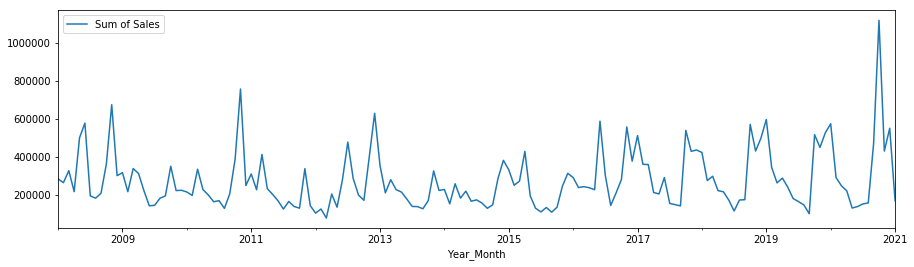

In [332]:
stationarity_testing(books_grouped)

### As we can see, based on ADFuller Test, the data is not stationary but based on KPSS Test, the data is stationary which means the data is trend stationary which means we will have to remove trend to make series strict stationary.

### First we will try to see if removing trend improves.

In [333]:
def find_trend(data):
    X = [i for i in range(len(data))]
    X = np.reshape(X, (len(X), 1))
    y = data.values
    model = LinearRegression()
    model.fit(X, y)
    trend = model.predict(X)
    detrended = [y[i]-trend[i] for i in range(0, len(data))]
    plt.figure(figsize=(15,4))
    plt.plot(y, label='Sum of Sales')
    plt.plot(trend, label='Trend')
    plt.plot(detrended, label='Detrended')
    plt.legend(loc="upper left")
    plt.show()

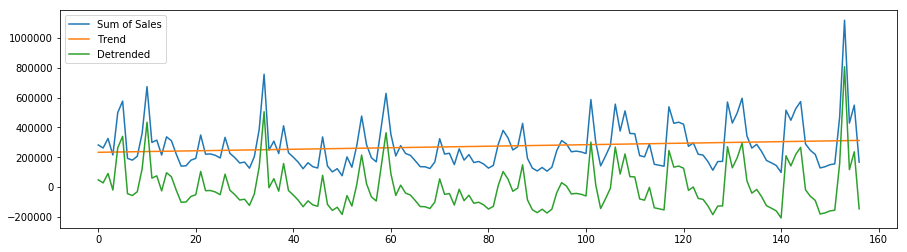

In [334]:
find_trend(books_grouped.dropna())

### Turns out, it doesn't. So now we will do differencing.

---ADFuller Test---
ADFuller Statistics:  -5.778944752109997
P-value:  5.179955882440168e-07
---KPSS Test---
KPSS Statistics:  0.04916762540489208
P-value:  0.1


Based on ADFuller Test, it is stationary
Based on KPSS Test, it is stationary




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


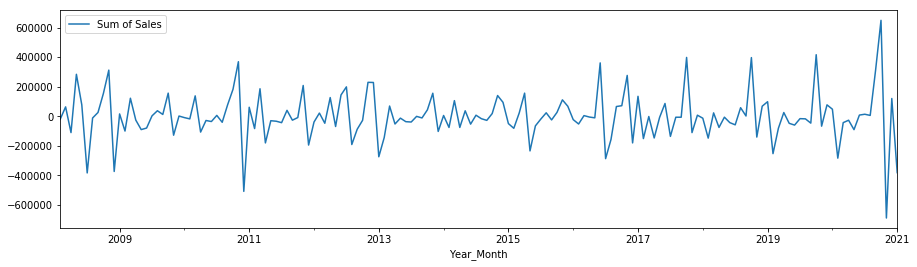

In [335]:
books_grouped_diff = books_grouped.diff()
stationarity_testing(books_grouped_diff[1:])

### We just need to see whether there is any seasonality issue.

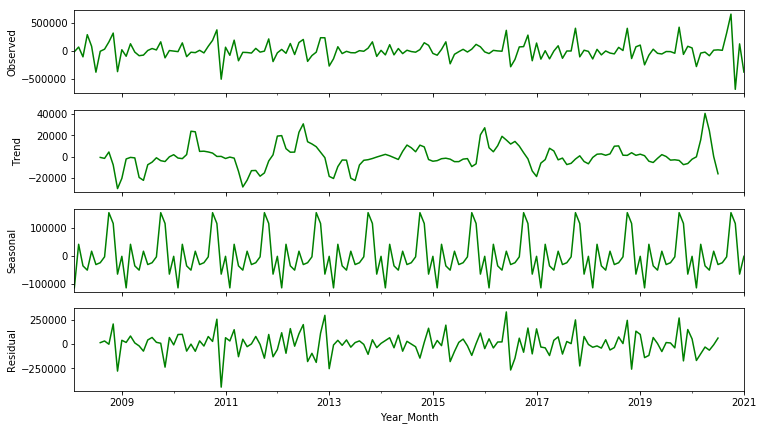

In [336]:
books_grouped_diff_period_1 = books_grouped_diff

rcParams['figure.figsize'] = 12, 7
decomposition = sm.tsa.seasonal_decompose(books_grouped_diff_period_1.dropna(), model='additive')
fig, axes = plt.subplots(4, 1, sharex=True)
decomposition.observed.plot(ax=axes[0], legend=False, color='g')
axes[0].set_ylabel('Observed')
decomposition.trend.plot(ax=axes[1], legend=False, color='g')
axes[1].set_ylabel('Trend')
decomposition.seasonal.plot(ax=axes[2], legend=False, color = 'g')
axes[2].set_ylabel('Seasonal')
decomposition.resid.plot(ax=axes[3], legend=False, color='g')
axes[3].set_ylabel('Residual')
plt.show()

### Looks like there is seasonality issue. Let's see if increasing the periods remove seasonality.

----------------------------------------Differencing by month 1----------------------------------------
---ADFuller Test---
ADFuller Statistics:  -5.778944752109997
P-value:  5.179955882440168e-07
---KPSS Test---
KPSS Statistics:  0.04916762540489208
P-value:  0.1


Based on ADFuller Test, it is stationary
Based on KPSS Test, it is stationary




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


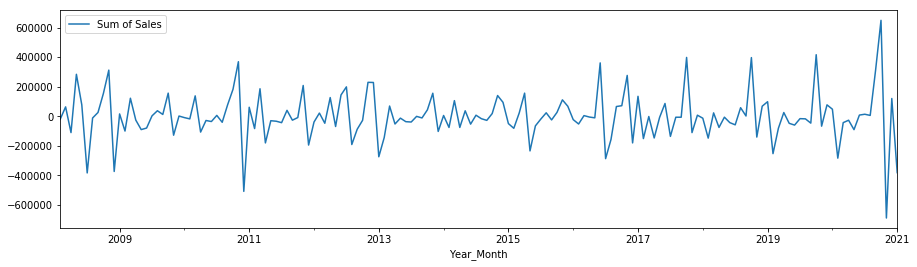

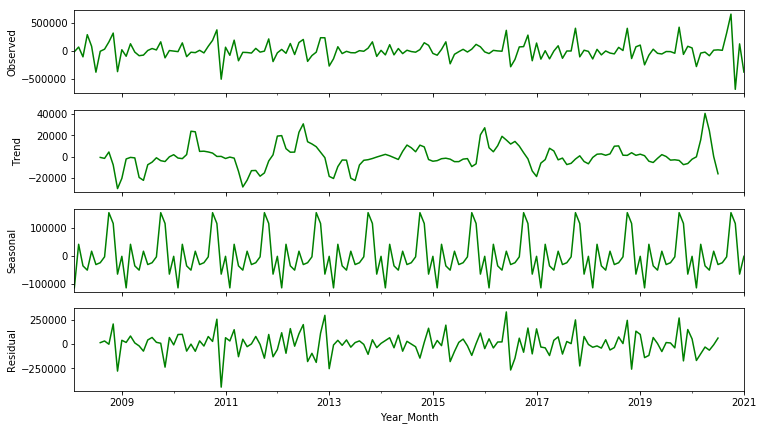



----------------------------------------Differencing by month 2----------------------------------------
---ADFuller Test---
ADFuller Statistics:  -5.682755662245515
P-value:  8.412543316875996e-07
---KPSS Test---
KPSS Statistics:  0.04736791499388791
P-value:  0.1


Based on ADFuller Test, it is stationary
Based on KPSS Test, it is stationary




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


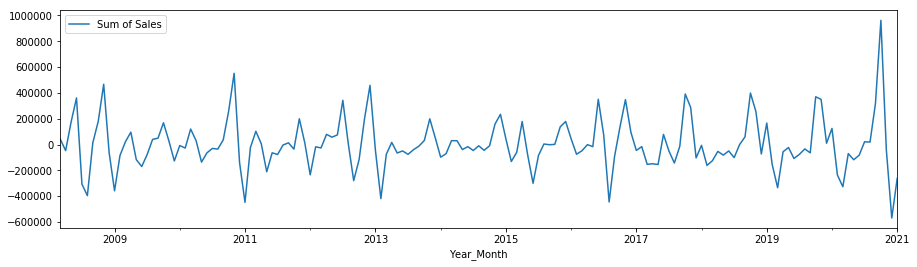

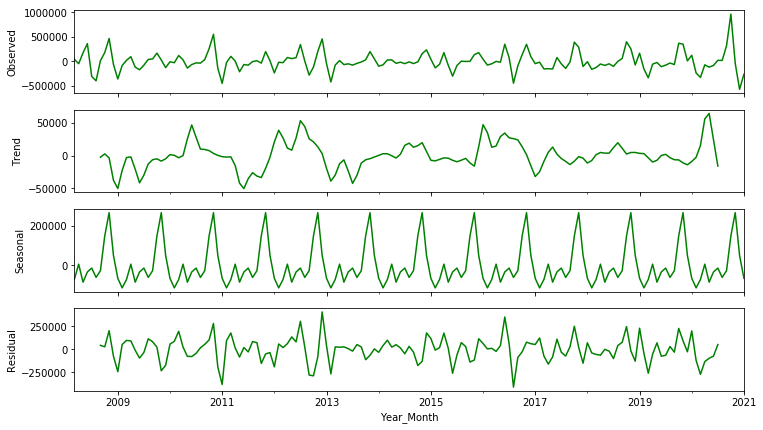



----------------------------------------Differencing by month 3----------------------------------------
---ADFuller Test---
ADFuller Statistics:  -6.0146621850336786
P-value:  1.5439169548308388e-07
---KPSS Test---
KPSS Statistics:  0.05671884336717128
P-value:  0.1


Based on ADFuller Test, it is stationary
Based on KPSS Test, it is stationary




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


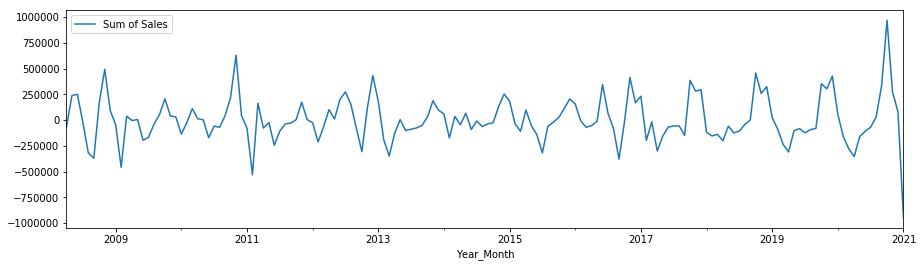

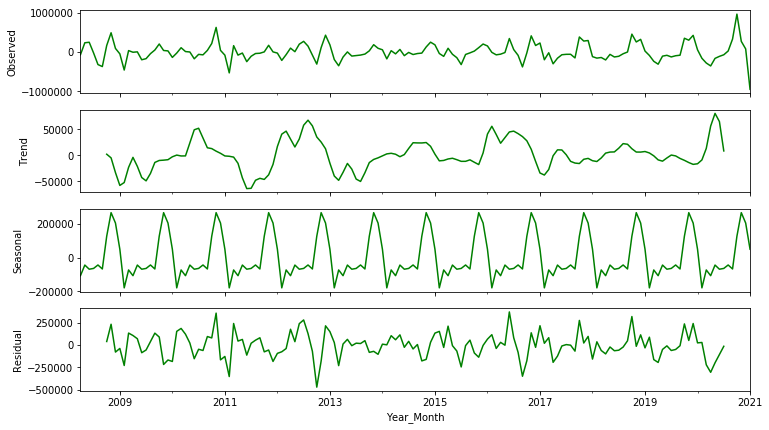



----------------------------------------Differencing by month 4----------------------------------------
---ADFuller Test---
ADFuller Statistics:  -5.563500519778505
P-value:  1.5229934654003473e-06
---KPSS Test---
KPSS Statistics:  0.1337263249864388
P-value:  0.1


Based on ADFuller Test, it is stationary
Based on KPSS Test, it is stationary




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


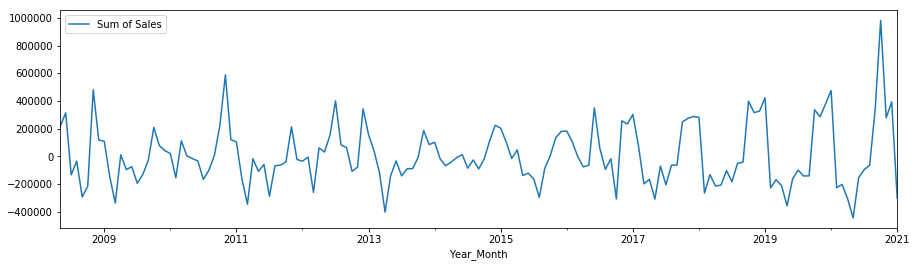

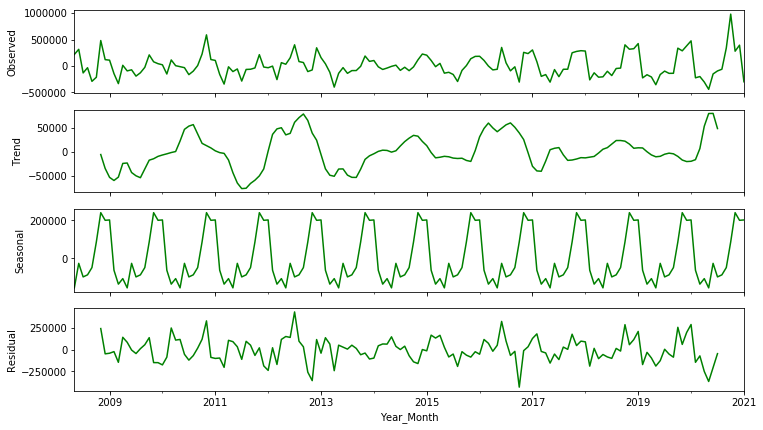



----------------------------------------Differencing by month 5----------------------------------------
---ADFuller Test---
ADFuller Statistics:  -5.014517711285031
P-value:  2.077079903568426e-05
---KPSS Test---
KPSS Statistics:  0.17210554549207266
P-value:  0.1


Based on ADFuller Test, it is stationary
Based on KPSS Test, it is stationary




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


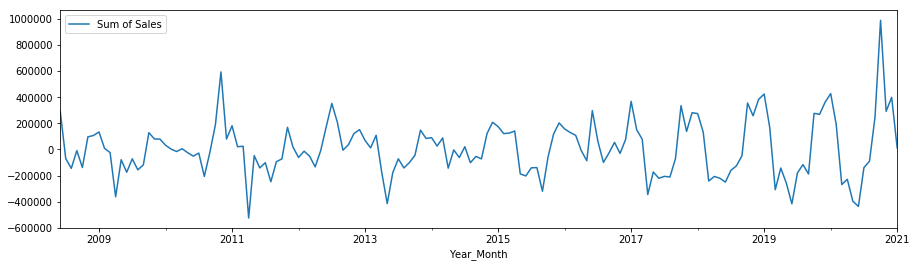

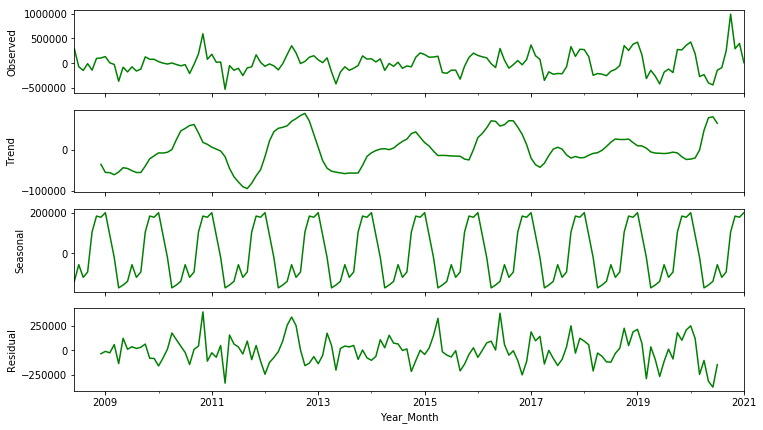



----------------------------------------Differencing by month 6----------------------------------------
---ADFuller Test---
ADFuller Statistics:  -4.4971021574843295
P-value:  0.00019902435856215676
---KPSS Test---
KPSS Statistics:  0.18860424275128998
P-value:  0.1


Based on ADFuller Test, it is stationary
Based on KPSS Test, it is stationary




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


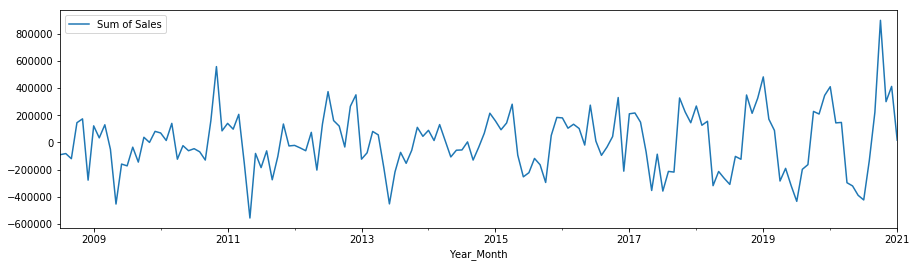

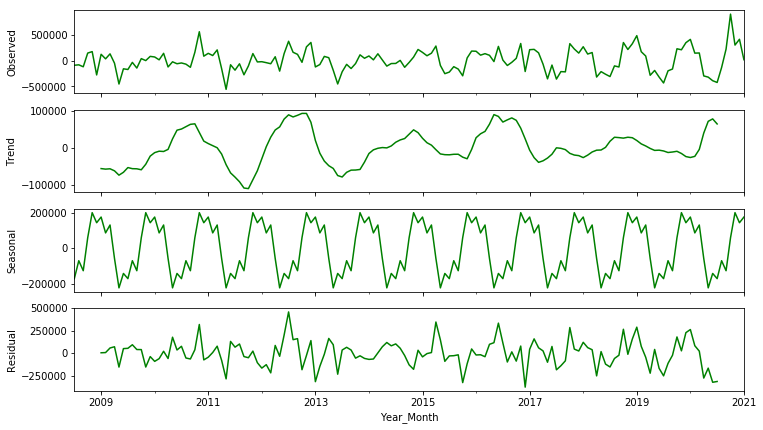



----------------------------------------Differencing by month 7----------------------------------------
---ADFuller Test---
ADFuller Statistics:  -5.490089280232889
P-value:  2.1851434181378485e-06
---KPSS Test---
KPSS Statistics:  0.1598409707472698
P-value:  0.1


Based on ADFuller Test, it is stationary
Based on KPSS Test, it is stationary




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


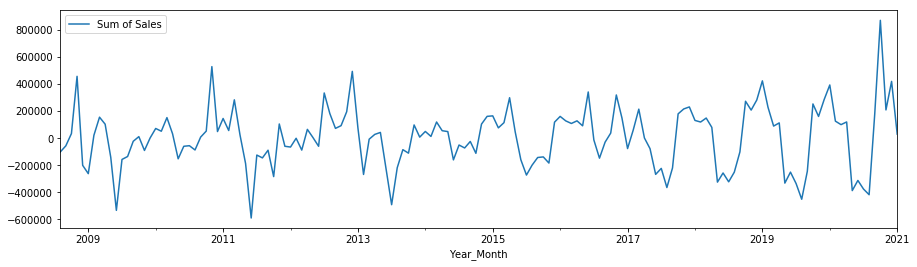

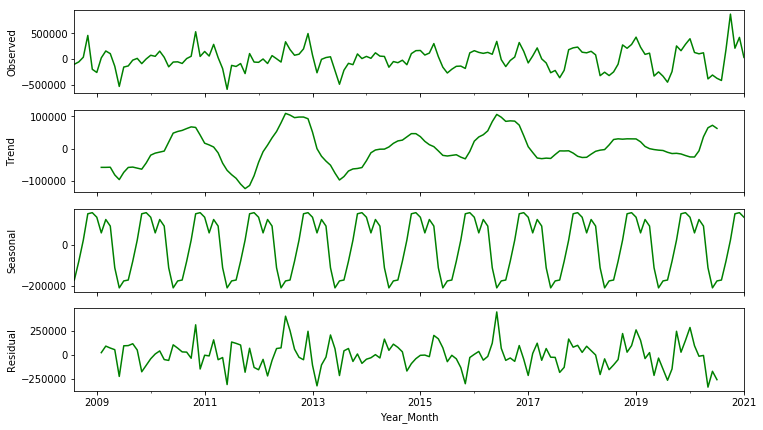



----------------------------------------Differencing by month 8----------------------------------------
---ADFuller Test---
ADFuller Statistics:  -5.281425686445909
P-value:  5.982188200907607e-06
---KPSS Test---
KPSS Statistics:  0.1337502895659221
P-value:  0.1


Based on ADFuller Test, it is stationary
Based on KPSS Test, it is stationary




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


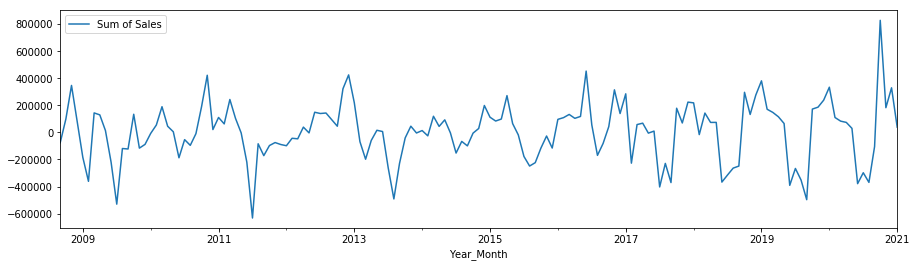

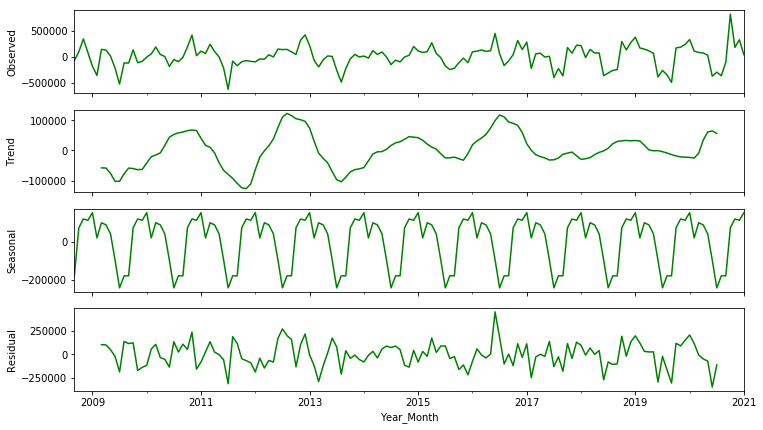



----------------------------------------Differencing by month 9----------------------------------------
---ADFuller Test---
ADFuller Statistics:  -5.869825220075519
P-value:  3.2600330093224244e-07
---KPSS Test---
KPSS Statistics:  0.1143202010079846
P-value:  0.1


Based on ADFuller Test, it is stationary
Based on KPSS Test, it is stationary




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


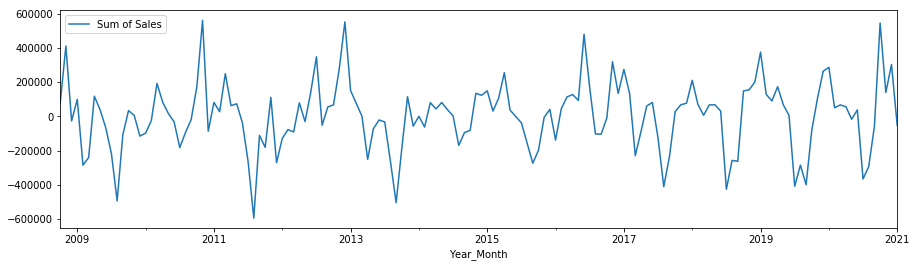

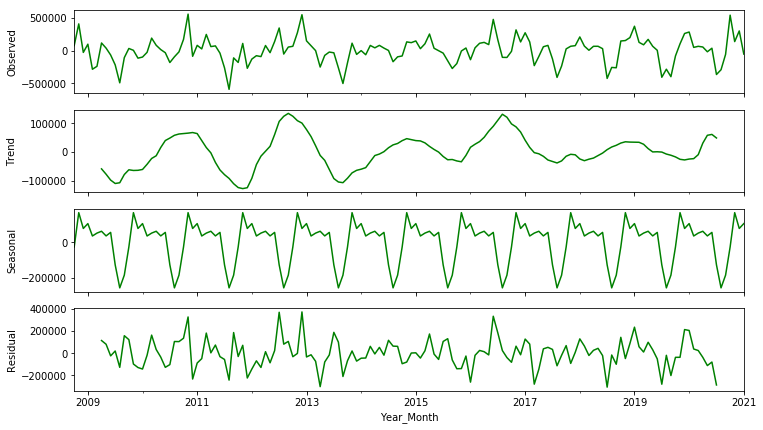



----------------------------------------Differencing by month 10----------------------------------------
---ADFuller Test---
ADFuller Statistics:  -5.298169804309101
P-value:  5.5236545212575105e-06
---KPSS Test---
KPSS Statistics:  0.12326425001723061
P-value:  0.1


Based on ADFuller Test, it is stationary
Based on KPSS Test, it is stationary




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


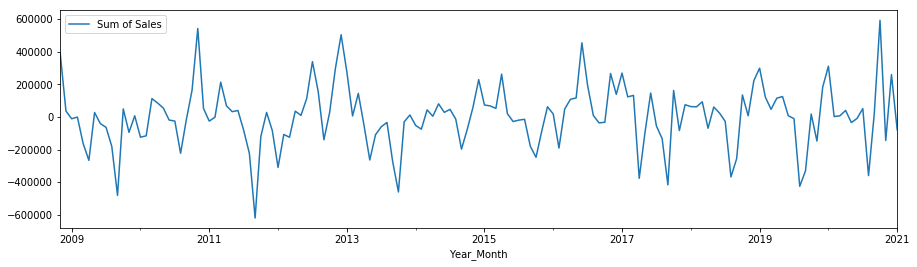

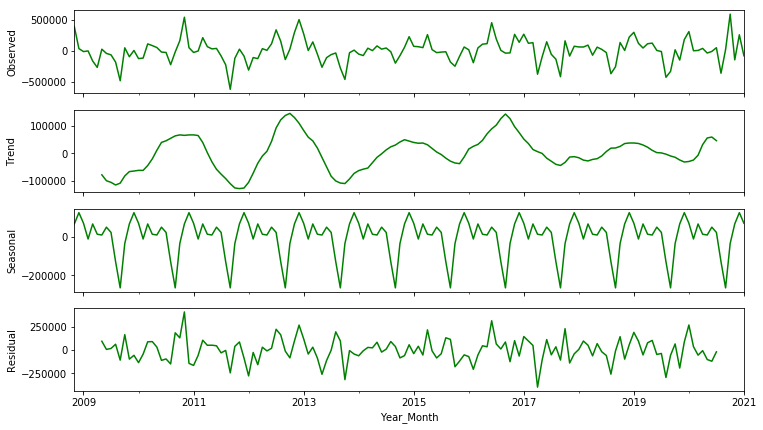



----------------------------------------Differencing by month 11----------------------------------------
---ADFuller Test---
ADFuller Statistics:  -5.554310999247758
P-value:  1.5936909252115762e-06
---KPSS Test---
KPSS Statistics:  0.1764325295257069
P-value:  0.1


Based on ADFuller Test, it is stationary
Based on KPSS Test, it is stationary




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


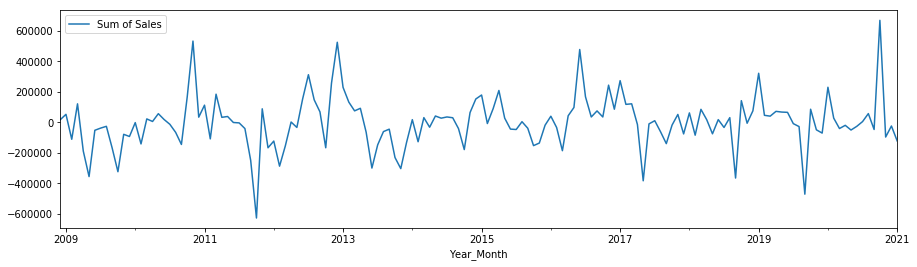

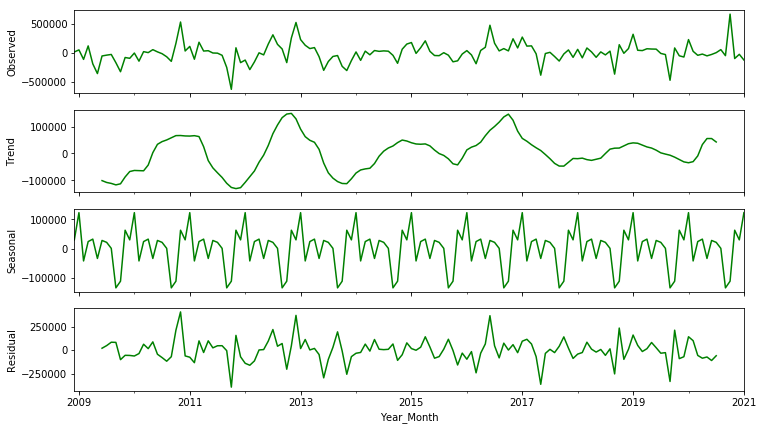



----------------------------------------Differencing by month 12----------------------------------------
---ADFuller Test---
ADFuller Statistics:  -7.006332811155428
P-value:  7.106374271723145e-10
---KPSS Test---
KPSS Statistics:  0.18336801640642292
P-value:  0.1


Based on ADFuller Test, it is stationary
Based on KPSS Test, it is stationary




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


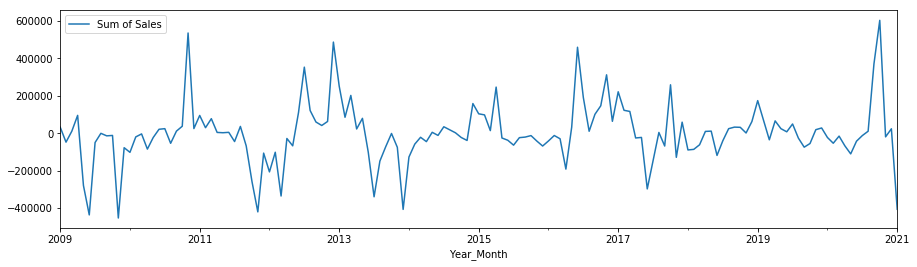

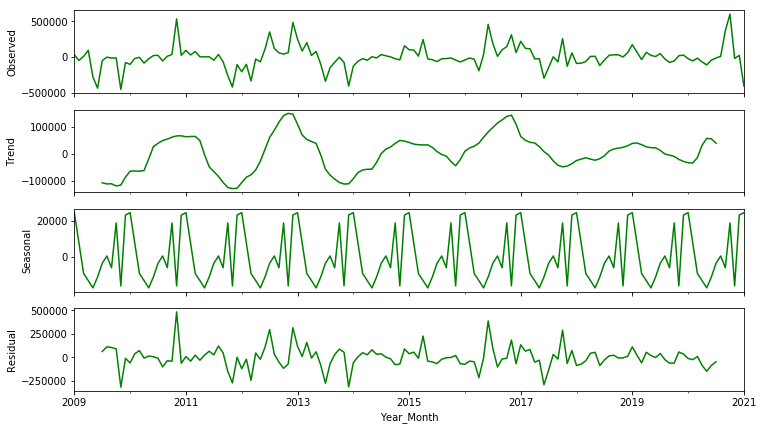

In [337]:
for i in range(1,13):
    print(40*('-') + "Differencing by month " + str(i) + 40*('-'))
    books_grouped_diff = books_grouped.diff(periods=i)
    stationarity_testing(books_grouped_diff[i:])
    rcParams['figure.figsize'] = 12, 7
    decomposition = sm.tsa.seasonal_decompose(books_grouped_diff.dropna(), model='additive')
    fig, axes = plt.subplots(4, 1, sharex=True)
    decomposition.observed.plot(ax=axes[0], legend=False, color='g')
    axes[0].set_ylabel('Observed')
    decomposition.trend.plot(ax=axes[1], legend=False, color='g')
    axes[1].set_ylabel('Trend')
    decomposition.seasonal.plot(ax=axes[2], legend=False, color = 'g')
    axes[2].set_ylabel('Seasonal')
    decomposition.resid.plot(ax=axes[3], legend=False, color='g')
    axes[3].set_ylabel('Residual')
    plt.show()
    print('\n')

### Turns out, it doesn't. For now, we will be taking seasonality into the model and see if it learns. And we are keeping period=1.

In [338]:
# books_grouped_diff_period_1.to_csv("Stationary_Sum_of_Sales.csv")

### Now we will replace the stationary "sum of sales" data with the original one.

In [27]:
original_book_data = pd.read_csv('/Users/rahulnair/Desktop/Labelmaster_/Sales_Data/Books_ext_fs.csv')
original_book_data

,Year_Month,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking","FTR Active Truck Utilization (%, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking",Spot TL Rates (w/o FSC)_rates_m_trucking,Total LTL (w/o FSC)_rates_m_trucking,Total LTL (w/ FSC)_rates_m_trucking,...,BUILD FOR_All_Other,Change in Distillate Fuel Inventories_x,Intermodal Revenue Movements (IANA-ETSO)_Total_x,FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_x,U.S. Origin Intermodal Volumes_International_x,Canada Origin Intermodal Volumes_Domestic_x,"N.A. Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_Exports_x","Gulf Coast Port Activity, Total TEUs_Exports_x","Western Canadian Port Activity, Total TEUs_Exports_x"
0,2008-01,282604.11,57633.608984,88.294650,3940.638792,6915.782704,3013.868684,96.932289,99.755501,114.408275,...,969.0,-2981.0,1156094.0,3.341993,557011.0,46969.0,1.035742e+06,428531.270000,90322.590000,70230.000000
1,2008-02,262474.40,57175.659828,87.998407,3927.115595,6836.939472,2975.285847,99.719858,99.755501,114.867841,...,1104.0,-13327.0,1088826.0,2.285576,501961.0,44924.0,1.138045e+06,478707.330000,100410.660000,86567.000000
2,2008-03,326059.68,56814.700553,87.790155,3922.853376,6758.129439,2941.079313,103.347853,100.488998,117.070858,...,1158.0,-9852.0,1082825.0,1.924076,481100.0,46727.0,1.167742e+06,500866.450000,93384.280000,80451.000000
3,2008-04,215387.49,56916.813852,89.639867,3978.633479,6858.428982,2906.591249,111.718085,101.589242,122.811123,...,931.0,-733.0,1158286.0,5.986521,528843.0,53497.0,1.156788e+06,486063.840000,101642.940000,84739.000000
4,2008-05,499559.90,56194.246889,89.134818,3990.692209,6804.610846,2872.185063,117.525703,101.314181,123.968232,...,991.0,6890.0,1184144.0,7.940801,541259.0,53653.0,1.185090e+06,490618.980000,105424.640000,89548.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2020-07,150348.10,61469.059874,89.962431,4379.187334,6571.127779,2639.040651,115.128696,102.231051,113.578198,...,1359.0,2134.0,1526490.0,-0.192121,513074.0,57503.0,1.095134e+06,393775.832112,125276.157772,103172.000000
151,2020-08,156066.95,62140.797176,90.641835,4404.415547,6601.260917,2676.666422,129.107598,104.339853,115.812566,...,1671.0,1353.0,1575928.0,0.625716,546740.0,56478.0,1.108304e+06,389408.103791,125319.157772,93979.000000
152,2020-09,468710.96,62170.174317,90.587889,4381.188114,6556.745680,2600.808117,136.100117,105.898533,117.464895,...,1711.0,-7196.0,1617044.0,5.475578,557748.0,59269.0,1.099329e+06,386298.700253,117576.128306,103129.000000
153,2020-10,1118446.80,62870.759335,94.367218,4436.920215,6523.796564,2593.200335,140.122763,106.265281,117.793788,...,2018.0,-10130.4,1705714.0,9.817290,591616.0,60708.0,1.186353e+06,410614.677268,123604.184721,105255.000000


In [33]:
stationary_data = pd.read_csv('/Users/rahulnair/Desktop/Labelmaster_/Sales_Data/Stationary_Sum_of_Sales.csv')
y_m = []
for i in stationary_data['Year_Month']:
    y_m.append(''.join(re.findall('\d+-\d+', i)))
    
stationary_data['Year_Month'] = pd.Series(y_m)
stationary_data

,Year_Month,Sum of Sales
0,2008-01,NaN
1,2008-02,-20129.71
2,2008-03,63585.28
3,2008-04,-110672.19
4,2008-05,284172.41
...,...,...
152,2020-09,312644.01
153,2020-10,649735.84
154,2020-11,-689280.03
155,2020-12,120248.24


In [34]:
stationary_data = stationary_data.rename(columns={'Sum of Sales': 'Stationary_Sum_of_Sales'})

In [35]:
new_data = pd.merge(original_book_data, stationary_data, how='inner', on='Year_Month')

In [36]:
new_data

,Year_Month,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking","FTR Active Truck Utilization (%, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking",Spot TL Rates (w/o FSC)_rates_m_trucking,Total LTL (w/o FSC)_rates_m_trucking,Total LTL (w/ FSC)_rates_m_trucking,...,Change in Distillate Fuel Inventories_x,Intermodal Revenue Movements (IANA-ETSO)_Total_x,FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_x,U.S. Origin Intermodal Volumes_International_x,Canada Origin Intermodal Volumes_Domestic_x,"N.A. Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_Exports_x","Gulf Coast Port Activity, Total TEUs_Exports_x","Western Canadian Port Activity, Total TEUs_Exports_x",Stationary_Sum_of_Sales
0,2008-01,282604.11,57633.608984,88.294650,3940.638792,6915.782704,3013.868684,96.932289,99.755501,114.408275,...,-2981.0,1156094.0,3.341993,557011.0,46969.0,1.035742e+06,428531.270000,90322.590000,70230.000000,NaN
1,2008-02,262474.40,57175.659828,87.998407,3927.115595,6836.939472,2975.285847,99.719858,99.755501,114.867841,...,-13327.0,1088826.0,2.285576,501961.0,44924.0,1.138045e+06,478707.330000,100410.660000,86567.000000,-20129.71
2,2008-03,326059.68,56814.700553,87.790155,3922.853376,6758.129439,2941.079313,103.347853,100.488998,117.070858,...,-9852.0,1082825.0,1.924076,481100.0,46727.0,1.167742e+06,500866.450000,93384.280000,80451.000000,63585.28
3,2008-04,215387.49,56916.813852,89.639867,3978.633479,6858.428982,2906.591249,111.718085,101.589242,122.811123,...,-733.0,1158286.0,5.986521,528843.0,53497.0,1.156788e+06,486063.840000,101642.940000,84739.000000,-110672.19
4,2008-05,499559.90,56194.246889,89.134818,3990.692209,6804.610846,2872.185063,117.525703,101.314181,123.968232,...,6890.0,1184144.0,7.940801,541259.0,53653.0,1.185090e+06,490618.980000,105424.640000,89548.000000,284172.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2020-07,150348.10,61469.059874,89.962431,4379.187334,6571.127779,2639.040651,115.128696,102.231051,113.578198,...,2134.0,1526490.0,-0.192121,513074.0,57503.0,1.095134e+06,393775.832112,125276.157772,103172.000000,13635.82
151,2020-08,156066.95,62140.797176,90.641835,4404.415547,6601.260917,2676.666422,129.107598,104.339853,115.812566,...,1353.0,1575928.0,0.625716,546740.0,56478.0,1.108304e+06,389408.103791,125319.157772,93979.000000,5718.85
152,2020-09,468710.96,62170.174317,90.587889,4381.188114,6556.745680,2600.808117,136.100117,105.898533,117.464895,...,-7196.0,1617044.0,5.475578,557748.0,59269.0,1.099329e+06,386298.700253,117576.128306,103129.000000,312644.01
153,2020-10,1118446.80,62870.759335,94.367218,4436.920215,6523.796564,2593.200335,140.122763,106.265281,117.793788,...,-10130.4,1705714.0,9.817290,591616.0,60708.0,1.186353e+06,410614.677268,123604.184721,105255.000000,649735.84


### We don't need "sum of sales" column now. 

In [37]:
new_data = new_data.drop('Sum of Sales', axis=1)

In [38]:
new_data

,Year_Month,"FTR Truck Loadings (000s, SA)_freight_m_trucking","FTR Active Truck Utilization (%, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking",Spot TL Rates (w/o FSC)_rates_m_trucking,Total LTL (w/o FSC)_rates_m_trucking,Total LTL (w/ FSC)_rates_m_trucking,Contract TL Tank Rates (w/o FSC)_rates_m_trucking,...,Change in Distillate Fuel Inventories_x,Intermodal Revenue Movements (IANA-ETSO)_Total_x,FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_x,U.S. Origin Intermodal Volumes_International_x,Canada Origin Intermodal Volumes_Domestic_x,"N.A. Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_Exports_x","Gulf Coast Port Activity, Total TEUs_Exports_x","Western Canadian Port Activity, Total TEUs_Exports_x",Stationary_Sum_of_Sales
0,2008-01,57633.608984,88.294650,3940.638792,6915.782704,3013.868684,96.932289,99.755501,114.408275,99.995901,...,-2981.0,1156094.0,3.341993,557011.0,46969.0,1.035742e+06,428531.270000,90322.590000,70230.000000,NaN
1,2008-02,57175.659828,87.998407,3927.115595,6836.939472,2975.285847,99.719858,99.755501,114.867841,100.276486,...,-13327.0,1088826.0,2.285576,501961.0,44924.0,1.138045e+06,478707.330000,100410.660000,86567.000000,-20129.71
2,2008-03,56814.700553,87.790155,3922.853376,6758.129439,2941.079313,103.347853,100.488998,117.070858,99.727612,...,-9852.0,1082825.0,1.924076,481100.0,46727.0,1.167742e+06,500866.450000,93384.280000,80451.000000,63585.28
3,2008-04,56916.813852,89.639867,3978.633479,6858.428982,2906.591249,111.718085,101.589242,122.811123,99.057287,...,-733.0,1158286.0,5.986521,528843.0,53497.0,1.156788e+06,486063.840000,101642.940000,84739.000000,-110672.19
4,2008-05,56194.246889,89.134818,3990.692209,6804.610846,2872.185063,117.525703,101.314181,123.968232,97.828232,...,6890.0,1184144.0,7.940801,541259.0,53653.0,1.185090e+06,490618.980000,105424.640000,89548.000000,284172.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2020-07,61469.059874,89.962431,4379.187334,6571.127779,2639.040651,115.128696,102.231051,113.578198,115.191063,...,2134.0,1526490.0,-0.192121,513074.0,57503.0,1.095134e+06,393775.832112,125276.157772,103172.000000,13635.82
151,2020-08,62140.797176,90.641835,4404.415547,6601.260917,2676.666422,129.107598,104.339853,115.812566,114.911925,...,1353.0,1575928.0,0.625716,546740.0,56478.0,1.108304e+06,389408.103791,125319.157772,93979.000000,5718.85
152,2020-09,62170.174317,90.587889,4381.188114,6556.745680,2600.808117,136.100117,105.898533,117.464895,115.470202,...,-7196.0,1617044.0,5.475578,557748.0,59269.0,1.099329e+06,386298.700253,117576.128306,103129.000000,312644.01
153,2020-10,62870.759335,94.367218,4436.920215,6523.796564,2593.200335,140.122763,106.265281,117.793788,115.098017,...,-10130.4,1705714.0,9.817290,591616.0,60708.0,1.186353e+06,410614.677268,123604.184721,105255.000000,649735.84


In [ ]:
new_data.to_csv('/Users/rahulnair/Desktop/Labelmaster_/Sales_Data/Stationary_Sum_of_Sales.csv')